In [41]:
# импортируем библиотеки
import requests
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
from datetime import datetime, date, time
from pygal.table import Table
from lxml.html import builder, tostring


In [43]:
# сохраним в списке launch_dicts словари с названием миссии, датой запуска и ссылкой на описание с сайта
# Описание API по ссылке https://documenter.getpostman.com/view/2025350/RWaEzAiG#c7162816-0560-48ea-84ba-ed8ca4240647
import requests
import pygal
from pygal.style import LightColorizedStyle as LCS, LightenStyle as LS
from datetime import datetime, date, time
url = 'https://api.spacexdata.com/v3/history'
r = requests.get(url)
# проверка ответа
print("Status code: ", r.status_code)

#сохранение ответа API в переменной
response_dicts = r.json()
launch_dicts = []
ids = []

for response_dict in response_dicts:
    launch_dict = {
            'Название миссии' : response_dict['title'] , 
            'Дата': datetime.strptime(response_dict['event_date_utc'][:10], '%Y-%m-%d').strftime('%d.%m.%Y'),
            'Ссылка на статью' : response_dict['links']['article'],
            
            }
    launch_dicts.append(launch_dict)
for response_dict in response_dicts:
	id_ = response_dict['id']
	ids.append('Launch_id: ' + str(id_))

Status code:  200


In [44]:
# создадим пандас дата фрейм
import pandas as pd
df = pd.DataFrame(data=launch_dicts)
df

,Дата,Название миссии,Ссылка на статью
0,28.09.2008,Falcon 1 Makes History,http://www.spacex.com/news/2013/02/11/flight-4...
1,23.12.2008,SpaceX Wins $1.6B CRS Contract,https://www.nasaspaceflight.com/2008/12/spacex...
2,13.07.2009,Falcon 1 Flight 5 Makes History,http://www.spacex.com/news/2013/02/12/falcon-1...
3,04.06.2010,Falcon 9 First Flight,http://www.bbc.com/news/10209704
4,08.12.2010,Dragon Returns From Earth Orbit,http://www.cnn.com/2010/US/12/08/space.flight/...
5,08.10.2012,First Dragon Visit to Space Station,http://thespacereview.com/article/2168/1
6,07.10.2013,Grasshopper Completes Half-Mile Flight,http://spacenews.com/37740spacex-retires-grass...
7,03.12.2013,First Flight of Falcon 9 to GTO,http://www.newspacejournal.com/2013/03/27/afte...
8,18.04.2014,First Stage Landing,https://www.space.com/25562-spacex-falcon-9-re...
9,02.05.2014,Falcon 9 Reusable Test Vehicle Flies 1000M,http://www.parabolicarc.com/2014/05/02/falcon-...


In [47]:
# в столбце "Дата" строковое значение даты в привычном россиянину формате. Группировать проблематично. 
# Сделаем отдельный столбец только с годом.
df['Год'] = df['Дата'].apply(lambda x: (x.split('.'))[2])
df


,Дата,Название миссии,Ссылка на статью,Год
0,28.09.2008,Falcon 1 Makes History,http://www.spacex.com/news/2013/02/11/flight-4...,2008
1,23.12.2008,SpaceX Wins $1.6B CRS Contract,https://www.nasaspaceflight.com/2008/12/spacex...,2008
2,13.07.2009,Falcon 1 Flight 5 Makes History,http://www.spacex.com/news/2013/02/12/falcon-1...,2009
3,04.06.2010,Falcon 9 First Flight,http://www.bbc.com/news/10209704,2010
4,08.12.2010,Dragon Returns From Earth Orbit,http://www.cnn.com/2010/US/12/08/space.flight/...,2010
5,08.10.2012,First Dragon Visit to Space Station,http://thespacereview.com/article/2168/1,2012
6,07.10.2013,Grasshopper Completes Half-Mile Flight,http://spacenews.com/37740spacex-retires-grass...,2013
7,03.12.2013,First Flight of Falcon 9 to GTO,http://www.newspacejournal.com/2013/03/27/afte...,2013
8,18.04.2014,First Stage Landing,https://www.space.com/25562-spacex-falcon-9-re...,2014
9,02.05.2014,Falcon 9 Reusable Test Vehicle Flies 1000M,http://www.parabolicarc.com/2014/05/02/falcon-...,2014


In [49]:
# можно сортировать по году
df.sort_values('Год', ascending=True)

,Дата,Название миссии,Ссылка на статью,Год
0,28.09.2008,Falcon 1 Makes History,http://www.spacex.com/news/2013/02/11/flight-4...,2008
1,23.12.2008,SpaceX Wins $1.6B CRS Contract,https://www.nasaspaceflight.com/2008/12/spacex...,2008
2,13.07.2009,Falcon 1 Flight 5 Makes History,http://www.spacex.com/news/2013/02/12/falcon-1...,2009
3,04.06.2010,Falcon 9 First Flight,http://www.bbc.com/news/10209704,2010
4,08.12.2010,Dragon Returns From Earth Orbit,http://www.cnn.com/2010/US/12/08/space.flight/...,2010
5,08.10.2012,First Dragon Visit to Space Station,http://thespacereview.com/article/2168/1,2012
6,07.10.2013,Grasshopper Completes Half-Mile Flight,http://spacenews.com/37740spacex-retires-grass...,2013
7,03.12.2013,First Flight of Falcon 9 to GTO,http://www.newspacejournal.com/2013/03/27/afte...,2013
10,16.09.2014,SpaceX Awarded Commercial Crew Contract,https://www.washingtonpost.com/news/the-switch...,2014
9,02.05.2014,Falcon 9 Reusable Test Vehicle Flies 1000M,http://www.parabolicarc.com/2014/05/02/falcon-...,2014


In [58]:
# посчитаем количество запусков за каждый год
count_launches = df[['Название миссии', 'Год']].groupby('Год').count()
# переименуем столбец с результатами
count_launches.columns = ['Launches']
count_launches

,Launches
Год,
2008,2
2009,1
2010,2
2012,1
2013,2
2014,3
2015,3
2016,1
2017,2


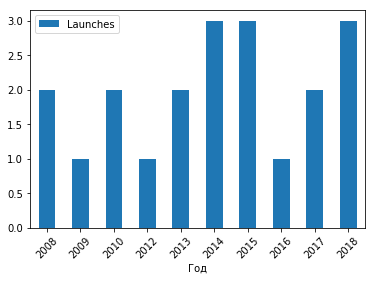

In [63]:
# простая визуализация
count_launches.plot(kind='bar', rot=45)